In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import locale as lc

In [3]:
df = pd.read_csv('data/CO2_price.csv', sep = ';')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (5,7,16,24,41,43,45,46,47,48,49,59,67,68,69,70,71,72,80,85,98,107,119,121,123,124,125,132,134,136,137,138,145,146,148,150,158,159,161,163,171,172,174,176,184,185,187,189,197,198,200,202,210,211,213,215,223,224,226,228,236,237,239,241,248,272,273,274) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,Euro Area,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 265,Hubei,Unnamed: 267,Unnamed: 268,Chongqing,Unnamed: 270,Unnamed: 271,Fujian,Unnamed: 273,Unnamed: 274
0,NaN,NaN,1,2,3,4,5,6,7.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,European Union,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Allowance Price,NaN,NaN,NaN,NaN,Stability Mechanisms,NaN,NaN,...,NaN,Hubei,NaN,NaN,Chongqing,NaN,NaN,Fujian,NaN,NaN
3,Date,Date as Text,Domestic Currency (EUR),Exchange Rate (USD),EUR_USD,Exchange Rate (EUR),EUR_EUR,NaN,NaN,NaN,...,Tianjin_EUR,Domestic Currency (CNY),Hubei_USD,Hubei_EUR,Domestic Currency (CNY),Chongqing_USD,Chongqing_EUR,Domestic Currency (CNY),Fujian_USD,Fujian_EUR
4,01.01.2005,janv-05,NaN,"0,76223662",NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dates = df['Unnamed: 0'][4:].to_numpy()

In [6]:
dates

array(['01.01.2005', '02.01.2005', '03.01.2005', ..., '28.06.2021',
       '29.06.2021', '30.06.2021'], dtype=object)

In [7]:
california = df['United States'][4:]
RGGI = df['United States.1'][4:]

In [8]:
def convert_to_float(prices, dates):
    new_dates = []
    new_prices = []
    for i,element in enumerate(prices): 
        if type(element) == str:
            lc.setlocale(lc.LC_ALL, 'nl_NL')
            new_prices.append(lc.atof(element))
            new_dates.append(dates[i])
        #else :
         #   new_array[i] = new_array[i-1]
    return(np.array(new_prices), np.array(new_dates))
            

In [9]:
california_co2_prices, california_dates = convert_to_float(california.to_numpy(), dates)
RGGI_co2_prices, RGGI_dates = convert_to_float(RGGI.to_numpy(), dates)

In [10]:
df_california = pd.DataFrame({'dates' : california_dates,
                'C02 prices' : california_co2_prices})

df_RGGI = pd.DataFrame({'dates' : RGGI_dates[1:],
          'C02 prices' : RGGI_co2_prices[1:]})

In [36]:
df_RGGI.to_csv('treated_data/Cost/rggi_co2_prices', sep=';', index = True)
df_california.to_csv('treated_data/Cost/california_co2_prices', sep=';', index=True)

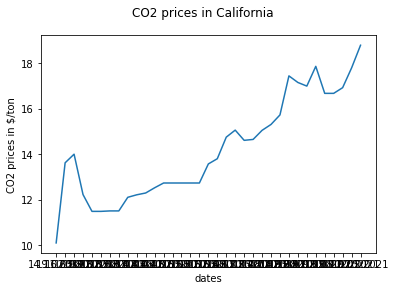

In [30]:
plt.suptitle('CO2 prices in California')
plt.xlabel('dates')
plt.ylabel('CO2 prices in $/ton')
plt.plot(california_dates, california_co2_prices)

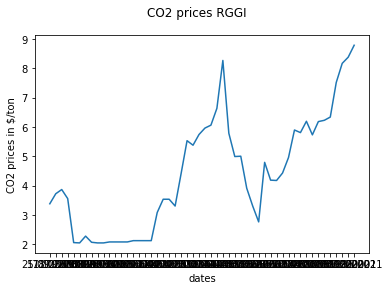

In [29]:
plt.suptitle('CO2 prices RGGI')
plt.xlabel('dates')
plt.ylabel('CO2 prices in $/ton')
plt.plot(RGGI_dates, RGGI_co2_prices)